In [1]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


class Polytrope(object):
    'Polytrope of index n'
    def __init__(self, n, h0=1.e-2, tol=1.e-12):
        self.n = n
        self.xi = []
        self.theta = []
        self.dtheta_dxi = []
        self._integrate(h0,tol)
    
    def _integrate(self, h0, tol):
        'Integrate the Lane-Emden system of equations'
        
        # solution vector q = (y,z) #
        q = np.zeros(2, dtype=np.float64)
        xi = 0.0
        h = h0
        
        # initial conditions #
        q[0] = 1.0
        q[1] = 0.0
        
        while h > tol:
            # 4th order RK method >> find slopes first #
            k1 = self._rhs(xi, q)
            k2 = self._rhs(xi+0.5*h, q+0.5*h*k1)
            k3 = self._rhs(xi+0.5*h, q+0.5*h*k2)
            k4 = self._rhs(xi+h, q+h*k3)
            
            # update solution to new ξ #
            q += (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
            xi += h
            
            # set the new stepsize #
            R_est = xi - q[0]/q[1]
            
            if xi + h > R_est:
                h = -q[0]/q[1]
            
            # store the solution #
            self.xi.append(xi)
            self.theta.append(q[0])
            self.dtheta_dxi = np.array(self.dtheta_dxi)
        
    def _rhs(self, xi, q):
        'The righthand side of the L-E system'
            
        f = np.zeros_like(q)
            
        # y' = z #
        f[0] = q[1]
            
        # to avoid division by 0, expansion is needed at xi = 0 #
        if xi == 0.0:
            f[1] = (2.0/3.0) - q[0]**self.n
        else:
            f[1] = -2.0*q[1]/xi - q[0]**self.n
        return f
        
    def plot(self):
        'Plot the solution'
        plt.xlabel('ζ') #<- set title for ζ axis
        plt.plot(self.xi, self.theta, label='θ') #<- plot θ
        plt.plot(self.xi, np.power(self.theta,self.n), label='$ρ/ρ_c$') #<- plot density ratio
        plt.legend(frameon=False) #<- set legend
        plt.title('Numerical Solutions for Polytrope Stellar Model') #<- set title for plot
        print('For n = '+str(self.n)+' -> '+u'ζ\u2081'+' = '+str(self.xi[len(self.xi)-1])) #<- display result for radius
        plt.show()  #<- show results in graph

Enter a numerical value for polytrope index n or type 999 to exit: 1.5
For n = 1.5 -> ζ₁ = 3.653753736185499


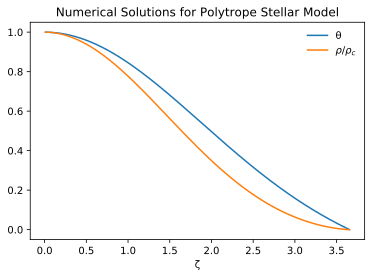

Enter a numerical value for polytrope index n or type 999 to exit: 4.7
For n = 4.7 -> ζ₁ = 54.8106318949905


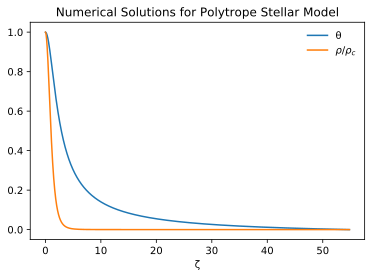

Enter a numerical value for polytrope index n or type 999 to exit: 3.2
For n = 3.2 -> ζ₁ = 7.768309895949636


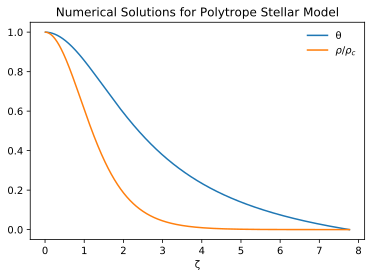

Enter a numerical value for polytrope index n or type 999 to exit: 999


In [2]:
# user input #
j = 1
k = 0

while(j != 0):
    try: #<- set value of polytrope index
        n = float(input('Enter a numerical value for polytrope index n or type 999 to exit: '))
        if n == 999:
            break
        elif n > 4.9: #<- protect from plotting a solution containing infinity
            print('For n = '+str(n)+': No solution is available for n larger than 4.9.\n')
        else:
            p = Polytrope(n)
            p.plot()
            j += 1
    except ValueError: 
        k += 1
        print('\nAn error has occured. Please try again.\nNote: ONLY the "." character is allowed and a numerical value MUST be entered.\n' + str(5-k) + ' attempts left.\n')
        if(k >= 5):
            raise SystemExit('Out of Attempts')